In [1197]:
from selenium import webdriver
import chromedriver_binary
from selenium.webdriver.common.keys import Keys as keys
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime
from datetime import date,timedelta

In [1528]:
def url_Time(url,year,month,day):
    now_date = date(year,month,day)
    old_date = now_date-timedelta(days=8030)
    URL_0 = url.split('from=')[0]
    URl_1 = url.split('from=')[1]
    URL_1_1 = URL_1.split('&to=')[1]
    URL_1_2 = URL_1_1.split('&time')[1]
    URL = URL_0+'from='+str(old_date)+'&to='+str(now_date)+'&time'+URL_1_2
    return URL

In [1529]:
URL = url_Time('https://finance.yahoo.co.jp/quote/4661.T/history?from=20201105&to=20211105&timeFrame=d&page=1',2021,11,10)

In [1530]:
URL

'https://finance.yahoo.co.jp/quote/4661.T/history?from=1999-11-16&to=2021-11-10&timeFrame=d&page=1'

In [1531]:
URL_1 = re.sub('-','',URL)

In [1532]:
URL_1

'https://finance.yahoo.co.jp/quote/4661.T/history?from=19991116&to=20211110&timeFrame=d&page=1'

In [973]:
now_Date,old_Date = Time(2021,11,10)

In [760]:
str(now_Date)

'2021-11-09'

In [761]:
str(old_Date)

'2011-11-12'

In [729]:
url

'https://finance.yahoo.co.jp/quote/4661.T/history?from=20201105&to=20211105&timeFrame=d&page=1'

In [721]:
URL_0 = url.split('from=')[0]

In [722]:
URL_0+'from='

'https://finance.yahoo.co.jp/quote/4661.T/history?from='

In [723]:
URL_1 = url.split('from=')[1]

In [1533]:
URL_1

'https://finance.yahoo.co.jp/quote/4661.T/history?from=19991116&to=20211110&timeFrame=d&page=1'

In [725]:
URL_1_1 = URL_1.split('&to=')[1]

In [726]:
URL_1_1

'20211105&timeFrame=d&page=1'

In [727]:
URL_1_2 = URL_1_1.split('&time')[1]

In [728]:
URL_1_2

'Frame=d&page=1'

In [966]:
URl = URL_0+'from='+str(old_Date)+'&to='+str(now_Date)+'&time'+URL_1_2

In [978]:
URL

'https://finance.yahoo.co.jp/quote/4661.T/history?from=2011-11-13&to=2021-11-10&timeFrame=d&page=1'

In [967]:
browser = webdriver.Chrome()

In [976]:
browser.get(URL)

In [974]:
URL

'https://finance.yahoo.co.jp/quote/4661.T/history?from=2011-11-13&to=2021-11-10&timeFrame=d&page=1'

In [979]:
j = 0
i = 0
Data_list = []
while i < 245:
    tag_ = browser.find_elements_by_class_name("_2ZqX1qip")
    tag_len = len(tag_)
    for j in range(tag_len):
        tag_text = tag_[j].text
        tag_Data = tag_text.split('\n')
        Data_list.append(tag_Data)
        j += 1
    name_ = browser.find_element_by_tag_name("thead")
    name_Data = name_.text.split(' ')
    df_ = pd.DataFrame(data=Data_list,columns=name_Data)
    next_ = browser.find_elements_by_class_name("cVr3KGRY")
    next_[1].click()
    i += 1
    time.sleep(1)

In [857]:
a = browser.find_elements_by_class_name('_2ZqX1qip')[1]

In [858]:
a.text

'2021年10月29日\n302,500\n319,000\n-20,300\n-16,700\n1.05'

In [980]:
j = 0
i = 0
Data_list = []
while i < 57:
    tag_ = browser.find_elements_by_class_name("_2ZqX1qip")
    tag_len = len(tag_)
    for j in range(tag_len):
        tag_text = tag_[j].text
        tag_Data = tag_text.split('\n')
        Data_list.append(tag_Data)
        j += 1
    name_ = browser.find_element_by_tag_name("thead")
    name_Data = name_.text.split(' ')
    df_3 = pd.DataFrame(data=Data_list,columns=name_Data)
    next_ = browser.find_elements_by_class_name("cVr3KGRY")
    next_[1].click()
    i += 1
    time.sleep(1)

In [1606]:
df_list_start = []
df_list_max = []
df_list_mine = []
df_list_end = []
df_list_day = []
i = 0
for i in range(len(df_)):
    try:
        df_day = (df_.loc[i]['日付'])
        df_start = (df_.loc[i]['始値'])
        df_max = (df_.loc[i]['高値'])
        df_mine = (df_.loc[i]['安値'])
        df_end = (df_.loc[i]['終値'])
        df_start_1 = re.sub(',','',df_start)
        df_max_1 = re.sub(',','',df_max)
        df_mine_1 = re.sub(',','',df_mine)
        df_end_1= re.sub(',','',df_end)
    except TypeError:
        continue
    finally:
        df_list_start.append(df_start_1)
        df_list_max.append(df_max_1)
        df_list_mine.append(df_mine_1)
        df_list_end.append(df_end_1)
        df_list_day.append(df_day)
        df_2 = pd.DataFrame(data = df_list_day,columns=['日付'])
        df_2['始値'] = df_list_start
        df_2['高値'] = df_list_max
        df_2['安値'] = df_list_mine
        df_2['終値'] = df_list_end

In [1600]:
DF_2 = df_2

In [1593]:
df_2['始値'][0]

'18900'

In [1585]:
b_list = []
for i in range(1,len(df_2)):
    a = df_list_end[i]
    b = df_list_end[i-1]
    st = df_list_start[i]
    z = (int(b)-int(a))*1/100
    b_list.append(z)
    if i == (len(df_2)-1):
        mean = sum(b_list)/len(b_list)
        Mean = round(mean,2)
        b_list.append(Mean)
        df_2['変化率'] = b_list

In [1605]:
for i in range(len(df_2)):
    st = df_2['始値'][i]
    mx = df_2['高値'][i]
    mi = df_2['安値'][i]
    ed = df_2['終値'][i]
    try:
        new_st = int(st)
        new_mx = int(mx)
        new_mi = int(mi)
        new_ed = int(ed)
    except ValueError:
        continue
    finally:
        df_2['始値(s)'] = new_st
        df_2['高値(m)'] = new_mx
        df_2['安値(mi)'] = new_mi
        df_2['終値(ed)'] = new_ed

In [1604]:
DF_2

,日付,始値,高値,安値,終値,始値(s),高値(m),安値(mi),終値(ed)
0,2021年11月10日,18900,19120,18775,18905,9000,9000,8720,8760
1,2021年11月9日,18700,18980,18635,18845,9000,9000,8720,8760
2,2021年11月8日,18500,18735,18430,18690,9000,9000,8720,8760
3,2021年11月5日,18165,18290,18050,18290,9000,9000,8720,8760
4,2021年11月4日,18005,18165,17865,18165,9000,9000,8720,8760
...,...,...,...,...,...,...,...,...,...
4896,2001年11月13日,8500,8700,8480,8640,9000,9000,8720,8760
4897,2001年11月12日,8650,8650,8580,8600,9000,9000,8720,8760
4898,2001年11月9日,8890,8890,8650,8650,9000,9000,8720,8760
4899,2001年11月8日,8740,8890,8710,8890,9000,9000,8720,8760


In [1602]:
df_2

,日付,始値,高値,安値,終値,始値(s),高値(m),安値(mi),終値(ed)
0,2021年11月10日,18900,19120,18775,18905,9000,9000,8720,8760
1,2021年11月9日,18700,18980,18635,18845,9000,9000,8720,8760
2,2021年11月8日,18500,18735,18430,18690,9000,9000,8720,8760
3,2021年11月5日,18165,18290,18050,18290,9000,9000,8720,8760
4,2021年11月4日,18005,18165,17865,18165,9000,9000,8720,8760
...,...,...,...,...,...,...,...,...,...
4896,2001年11月13日,8500,8700,8480,8640,9000,9000,8720,8760
4897,2001年11月12日,8650,8650,8580,8600,9000,9000,8720,8760
4898,2001年11月9日,8890,8890,8650,8650,9000,9000,8720,8760
4899,2001年11月8日,8740,8890,8710,8890,9000,9000,8720,8760


In [1607]:
for i in range(len(df_2)):
    st = df_list_start[i]
    mx = df_list_max[i]
    mi = df_list_mine[i]
    ed = df_list_end[i]
    new_st = int(st)
    new_mx = int(mx)
    new_mi = int(mi)
    new_ed = int(ed)
    df_2['始値'] = new_st
    df_2['高値'] = new_mx
    df_2['安値'] = new_mi
    df_2['終値'] = new_ed

ValueError: invalid literal for int() with base 10: '分割：1株→4株'

In [1611]:
df_list_start

['18900',
 '18700',
 '18500',
 '18165',
 '18005',
 '18180',
 '18100',
 '17820',
 '18290',
 '18085',
 '18020',
 '17965',
 '17980',
 '18070',
 '17930',
 '17825',
 '18065',
 '17775',
 '17555',
 '17875',
 '18000',
 '17605',
 '17645',
 '17670',
 '18495',
 '18550',
 '18250',
 '18030',
 '17975',
 '17450',
 '17920',
 '17690',
 '17290',
 '17170',
 '16890',
 '17045',
 '17105',
 '17020',
 '16595',
 '16440',
 '16455',
 '16410',
 '16525',
 '16250',
 '16800',
 '16320',
 '16525',
 '16665',
 '16625',
 '16630',
 '16390',
 '16500',
 '16265',
 '16150',
 '15810',
 '15510',
 '15400',
 '15655',
 '15730',
 '15630',
 '15510',
 '15680',
 '15500',
 '14980',
 '14970',
 '14950',
 '15200',
 '15000',
 '15095',
 '15200',
 '15460',
 '15650',
 '15645',
 '15590',
 '15375',
 '15070',
 '15465',
 '15570',
 '15940',
 '15980',
 '16150',
 '16060',
 '15600',
 '15945',
 '16215',
 '16300',
 '15965',
 '15900',
 '15870',
 '15945',
 '15850',
 '16180',
 '16130',
 '16260',
 '16495',
 '16260',
 '15800',
 '16400',
 '16295',
 '16250',


In [1590]:
df_2

,日付,始値,高値,安値,終値,変化率
0,2021年11月10日,9000,9000,8720,8760,0.60
1,2021年11月9日,9000,9000,8720,8760,1.55
2,2021年11月8日,9000,9000,8720,8760,4.00
3,2021年11月5日,9000,9000,8720,8760,1.25
4,2021年11月4日,9000,9000,8720,8760,2.00
...,...,...,...,...,...,...
4896,2001年11月13日,9000,9000,8720,8760,0.40
4897,2001年11月12日,9000,9000,8720,8760,-0.50
4898,2001年11月9日,9000,9000,8720,8760,-2.40
4899,2001年11月8日,9000,9000,8720,8760,1.30


In [1578]:
df_2['始値'][0]

9845

In [1571]:
df_list_start = []
df_list_max = []
df_list_mine = []
df_list_end = []
df_list_volume = []
df_list_change = []
df_list_day = []
i = 0
for i in range(len(df_2)):
    try:
        df_day = (df_.loc[i]['日付'])
        df_start = (df_.loc[i]['始値'])
        df_max = (df_.loc[i]['高値'])
        df_mine = (df_.loc[i]['安値'])
        df_end = (df_.loc[i]['終値'])
        df_volume = (df_.loc[i]['出来高'])
        df_start_1 = re.sub(',','',df_start)
        df_max_1 = re.sub(',','',df_max)
        df_mine_1 = re.sub(',','',df_mine)
        df_end_1= re.sub(',','',df_end)
        df_volume_1 = re.sub(',','',df_volume)
    except TypeError:
        continue
    finally:
        df_list_start.append(df_start_1)
        df_list_max.append(df_max_1)
        df_list_mine.append(df_mine_1)
        df_list_end.append(df_end_1)
        df_list_volume.append(df_volume_1)
        df_list_day.append(df_day)
        df_2 = pd.DataFrame(data = df_list_day,columns=['日付'])
        df_2['始値'] = df_list_start
        df_2['高値'] = df_list_max
        df_2['安値'] = df_list_mine
        df_2['終値'] = df_list_end
        df_2['出来高'] = df_list_volume

In [1572]:
df_2

,日付,始値,高値,安値,終値,出来高
0,2021年11月10日,18900,19120,18775,18905,682700
1,2021年11月9日,18700,18980,18635,18845,776100
2,2021年11月8日,18500,18735,18430,18690,970600
3,2021年11月5日,18165,18290,18050,18290,414900
4,2021年11月4日,18005,18165,17865,18165,500400
...,...,...,...,...,...,...
1611,2015年4月3日,9200,9390,9111,9390,1656700
1612,2015年4月2日,9250,9494,9163,9284,4418500
1613,2015年4月1日,9095,9199,8620,9101,4794500
1614,2015年3月31日,9700,9737,9095,9095,6812900


In [1547]:
int(df_2['始値'][0])

18900

In [1170]:
%matplotlib inline
import seaborn as ans

In [988]:
df_3

,日付,売残,買残,売残増減,買残増減,信用倍率
0,2021年11月5日,"326,000","298,200","23,500","-20,800",0.91
1,2021年10月29日,"302,500","319,000","-20,300","-16,700",1.05
2,2021年10月22日,"322,800","335,700","-5,500","3,300",1.04
3,2021年10月15日,"328,300","332,400","21,100","-19,100",1.01
4,2021年10月8日,"307,200","351,500","4,000","-24,800",1.14
...,...,...,...,...,...,...
1135,1999年7月9日,"72,000","152,000","7,000","29,000",2.11
1136,1999年7月2日,"65,000","123,000","-5,000","8,000",1.89
1137,1999年6月25日,"70,000","115,000","18,000","30,000",1.64
1138,1999年6月18日,"52,000","85,000","9,000","-23,000",1.63


In [1337]:
df_2

,日付,始値,高値,安値,終値,出来高,出来高(数値),変化率
0,2021年11月10日,18900,19120,18775,18905,682700,682700,0.60
1,2021年11月9日,18700,18980,18635,18845,776100,776100,1.55
2,2021年11月8日,18500,18735,18430,18690,970600,970600,4.00
3,2021年11月5日,18165,18290,18050,18290,414900,414900,1.25
4,2021年11月4日,18005,18165,17865,18165,500400,500400,2.00
...,...,...,...,...,...,...,...,...
4896,2001年11月13日,8500,8700,8480,8640,98100,98100,0.40
4897,2001年11月12日,8650,8650,8580,8600,77700,77700,-0.50
4898,2001年11月9日,8890,8890,8650,8650,89300,89300,-2.40
4899,2001年11月8日,8740,8890,8710,8890,88900,88900,1.30


In [1573]:
df_2['始値'] = df_2['始値'].astype(np.int)

In [1574]:
df_2['出来高'] = df_2['出来高'].astype(np.int)
df_2['始値'] = df_2['始値'].astype(np.int)
df_2['高値'] = df_2['高値'].astype(np.int)
df_2['安値'] = df_2['安値'].astype(np.int)
df_2['終値'] = df_2['終値'].astype(np.int)


In [1554]:
df_2.mean()

始値      11237.548267
高値      11344.626238
安値      11130.716584
終値      11240.873762
出来高    892992.883663
dtype: float64

In [1024]:
df_3['信用倍率(数値)'] = df_3['信用倍率'].astype(np.float64)

In [1025]:
df_3

,日付,売残,買残,売残増減,買残増減,信用倍率,信用倍率(数値)
0,2021年11月5日,"326,000","298,200","23,500","-20,800",0.91,0.91
1,2021年10月29日,"302,500","319,000","-20,300","-16,700",1.05,1.05
2,2021年10月22日,"322,800","335,700","-5,500","3,300",1.04,1.04
3,2021年10月15日,"328,300","332,400","21,100","-19,100",1.01,1.01
4,2021年10月8日,"307,200","351,500","4,000","-24,800",1.14,1.14
...,...,...,...,...,...,...,...
1135,1999年7月9日,"72,000","152,000","7,000","29,000",2.11,2.11
1136,1999年7月2日,"65,000","123,000","-5,000","8,000",1.89,1.89
1137,1999年6月25日,"70,000","115,000","18,000","30,000",1.64,1.64
1138,1999年6月18日,"52,000","85,000","9,000","-23,000",1.63,1.63


In [1353]:
df_2

,日付,始値,高値,安値,終値,出来高,変化率
0,2021年11月10日,18900,19120,18775,18905,682700,0.60
1,2021年11月9日,18700,18980,18635,18845,776100,1.55
2,2021年11月8日,18500,18735,18430,18690,970600,4.00
3,2021年11月5日,18165,18290,18050,18290,414900,1.25
4,2021年11月4日,18005,18165,17865,18165,500400,2.00
...,...,...,...,...,...,...,...
1611,2015年4月3日,9200,9390,9111,9390,1656700,1.06
1612,2015年4月2日,9250,9494,9163,9284,4418500,1.83
1613,2015年4月1日,9095,9199,8620,9101,4794500,0.06
1614,2015年3月31日,9700,9737,9095,9095,6812900,-5.48


In [1354]:
df_2.corr()

,始値,高値,安値,終値,出来高,変化率
始値,1.000000,0.999568,0.999604,0.999096,-0.234558,0.014900
高値,0.999568,1.000000,0.999483,0.999630,-0.223661,0.032208
安値,0.999604,0.999483,1.000000,0.999574,-0.244306,0.032421
終値,0.999096,0.999630,0.999574,1.000000,-0.233552,0.049513
出来高,-0.234558,-0.223661,-0.244306,-0.233552,1.000000,-0.001785
変化率,0.014900,0.032208,0.032421,0.049513,-0.001785,1.000000


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22987 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23433 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 32066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20986 missing from c

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22987 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20516 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 39640 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 23433 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 32066 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20986 missing from current fon

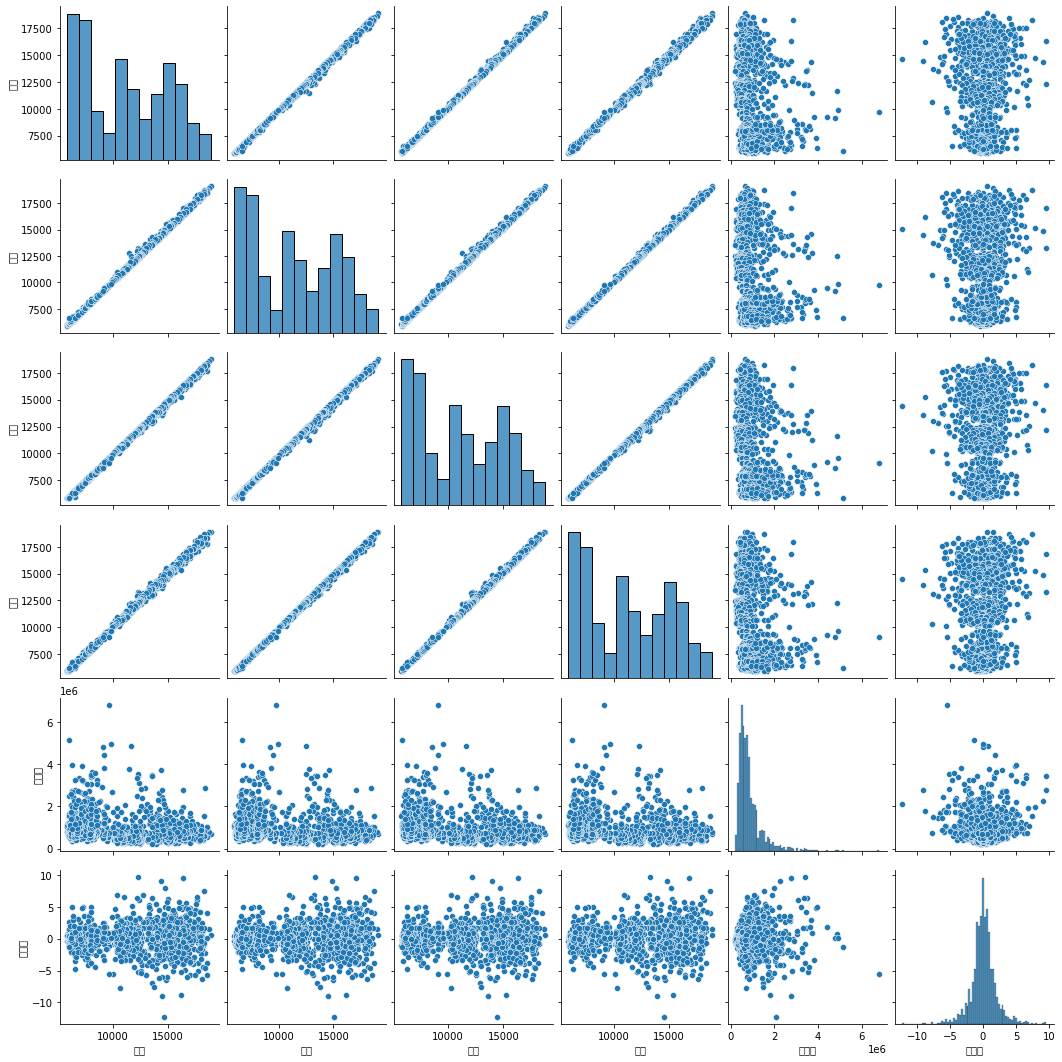

In [1355]:
ans.pairplot(df_2)

In [1358]:
df_2_change_list = []
df_2_start_list = []
df_2_max_list = []
df_2_min_list = []
df_2_end_list = []
df_3_beleve_list = []
days_list = []
for i in range(len(df_3)):
    a = df_2['日付'][i]
    for j in range(len(df_3)):
        b = df_3['日付'][j]
        if a == b:
            df_2_change_list.append(df_2['変化率'][i])
            df_2_start_list.append(df_2['始値'][i])
            df_2_max_list.append(df_2['高値'][i])
            df_2_min_list.append(df_2['安値'][i])
            df_2_end_list.append(df_2['終値'][i])
            df_3_beleve_list.append(df_3['信用倍率(数値)'][j])
            days_list.append(a)
            break
    else:
        continue
    continue

In [1144]:
len(df_2_change_list)

227

In [1145]:
len(df_3_beleve_list)

227

In [1151]:
len(days_list)

227

In [1359]:
df_4 = pd.DataFrame(data = days_list,columns=["日付"])

In [1361]:
"""
始値＝s
高値＝M
安値＝m
終値＝e
変化率＝c
信用倍率＝b
"""

'\n始値＝s\n高値＝M\n安値＝m\n終値＝e\n変化率＝c\n信用倍率＝b\n'

In [1362]:
df_4['s'] = df_2_start_list

In [1363]:
df_4['M'] = df_2_max_list

In [1364]:
df_4['m'] = df_2_min_list

In [1365]:
df_4['e'] = df_2_end_list

In [1366]:
df_4['c'] = df_2_change_list

In [1368]:
df_4['b'] = df_3_beleve_list

In [1373]:
df_4.corr()

,s,M,m,e,c,b
s,1.000000,0.999181,0.999378,0.998759,-0.024198,0.231180
M,0.999181,1.000000,0.999035,0.999414,-0.006096,0.234248
m,0.999378,0.999035,1.000000,0.999352,0.000198,0.233745
e,0.998759,0.999414,0.999352,1.000000,0.013855,0.234056
c,-0.024198,-0.006096,0.000198,0.013855,1.000000,0.068588
b,0.231180,0.234248,0.233745,0.234056,0.068588,1.000000


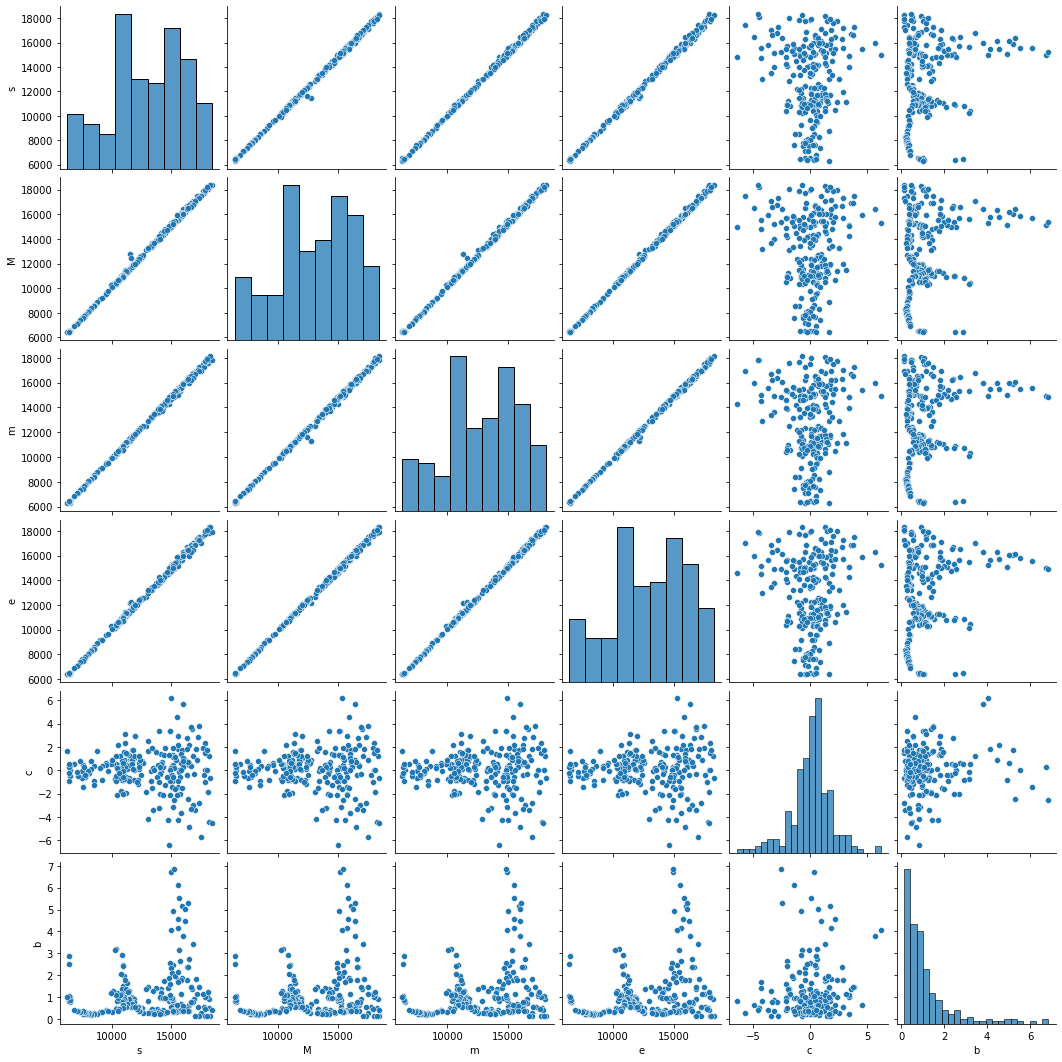

In [1371]:
ans.pairplot(df_4)

In [1374]:
df_2.corr()

,始値,高値,安値,終値,出来高,変化率
始値,1.000000,0.999568,0.999604,0.999096,-0.234558,0.014900
高値,0.999568,1.000000,0.999483,0.999630,-0.223661,0.032208
安値,0.999604,0.999483,1.000000,0.999574,-0.244306,0.032421
終値,0.999096,0.999630,0.999574,1.000000,-0.233552,0.049513
出来高,-0.234558,-0.223661,-0.244306,-0.233552,1.000000,-0.001785
変化率,0.014900,0.032208,0.032421,0.049513,-0.001785,1.000000


In [1538]:
df_2['始値'][0]

18900

In [1536]:
df_2_c

,出来高,変化率,始値,安値,日付,終値,高値
0,-2.102929e+05,0.542649,7662.451733,7644.283416,NaN,7664.126238,7775.373762
1,-1.168929e+05,1.492649,7462.451733,7504.283416,NaN,7604.126238,7635.373762
2,7.760712e+04,3.942649,7262.451733,7299.283416,NaN,7449.126238,7390.373762
3,-4.780929e+05,1.192649,6927.451733,6919.283416,NaN,7049.126238,6945.373762
4,-3.925929e+05,1.942649,6767.451733,6734.283416,NaN,6924.126238,6820.373762
...,...,...,...,...,...,...,...
1611,7.637071e+05,1.002649,-2037.548267,-2019.716584,NaN,-1850.873762,-1954.626238
1612,3.525507e+06,1.772649,-1987.548267,-1967.716584,NaN,-1956.873762,-1850.626238
1613,3.901507e+06,0.002649,-2142.548267,-2510.716584,NaN,-2139.873762,-2145.626238
1614,5.919907e+06,-5.537351,-1537.548267,-2035.716584,NaN,-2145.873762,-1607.626238


In [1450]:
x = df_2_c['始値']
y = df_2_c['終値']

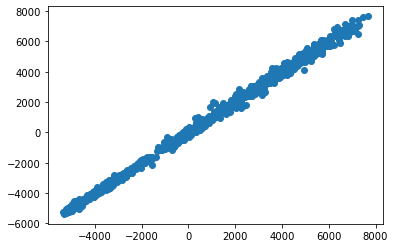

In [1451]:
plt.scatter(x,y)

In [1452]:
xx = x*x

In [1453]:
xx.sum()

22899204444.235146

In [1454]:
xy = x*y

In [1455]:
xy.sum()

22904387991.846535

In [1456]:
a = xy.sum()/xx.sum()

In [1457]:
a

1.0002263636548603

In [1458]:
a*x

0       7664.186233
1       7464.140961
2       7264.095688
3       6929.019856
4       6768.983638
           ...     
1611   -2038.009494
1612   -1987.998176
1613   -2143.033262
1614   -1537.896312
1615   -1392.863490
Name: 始値, Length: 1616, dtype: float64

In [1459]:
y

0       7664.126238
1       7604.126238
2       7449.126238
3       7049.126238
4       6924.126238
           ...     
1611   -1850.873762
1612   -1956.873762
1613   -2139.873762
1614   -2145.873762
1615   -1597.873762
Name: 終値, Length: 1616, dtype: float64

In [1460]:
x

0       7662.451733
1       7462.451733
2       7262.451733
3       6927.451733
4       6767.451733
           ...     
1611   -2037.548267
1612   -1987.548267
1613   -2142.548267
1614   -1537.548267
1615   -1392.548267
Name: 始値, Length: 1616, dtype: float64

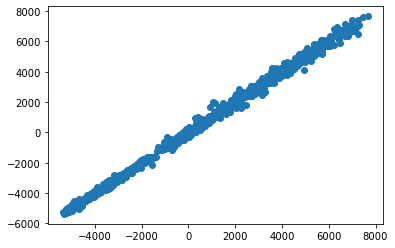

In [1461]:
plt.scatter(x,y)
plt.plot(x,a*x)

In [1462]:
a*x

0       7664.186233
1       7464.140961
2       7264.095688
3       6929.019856
4       6768.983638
           ...     
1611   -2038.009494
1612   -1987.998176
1613   -2143.033262
1614   -1537.896312
1615   -1392.863490
Name: 始値, Length: 1616, dtype: float64

In [1519]:
x_new = 18065

In [1520]:
mean = df_2.mean()

In [1521]:
mean['始値']

11237.548267326732

In [1522]:
xc = x_new - mean['始値']

In [1523]:
xc

6827.4517326732675

In [1524]:
yc = a*xc

In [1525]:
yc

6828.9972196008575

In [1526]:
y_hat = a*xc + mean['終値']

In [1527]:
y_hat

18069.870981977096

In [1410]:
df_2

,日付,始値,高値,安値,終値,出来高,変化率
0,2021年11月10日,18900,19120,18775,18905,682700,0.60
1,2021年11月9日,18700,18980,18635,18845,776100,1.55
2,2021年11月8日,18500,18735,18430,18690,970600,4.00
3,2021年11月5日,18165,18290,18050,18290,414900,1.25
4,2021年11月4日,18005,18165,17865,18165,500400,2.00
...,...,...,...,...,...,...,...
1611,2015年4月3日,9200,9390,9111,9390,1656700,1.06
1612,2015年4月2日,9250,9494,9163,9284,4418500,1.83
1613,2015年4月1日,9095,9199,8620,9101,4794500,0.06
1614,2015年3月31日,9700,9737,9095,9095,6812900,-5.48
